# Lotka-Volterra Work-Precision Diagrams

Adapted from 
[SciMLBenchmarks.jl Lotka-Volterra benchmark](https://benchmarks.sciml.ai/html/NonStiffODE/LotkaVolterra_wpd.html).

In [9]:
# Imports
using LinearAlgebra, Statistics
using OrdinaryDiffEq, ParameterizedFunctions, ODEInterfaceDiffEq, LSODA, Sundials, DiffEqDevTools
using Plots
using ProbNumDiffEq

In [10]:
# Plotting theme
theme(:dao;
    linewidth=8,
    linealpha=0.7,
    markersize=5,
    markerstrokewidth=0.5,
    legend=:outerright,
)

## Problem Definition

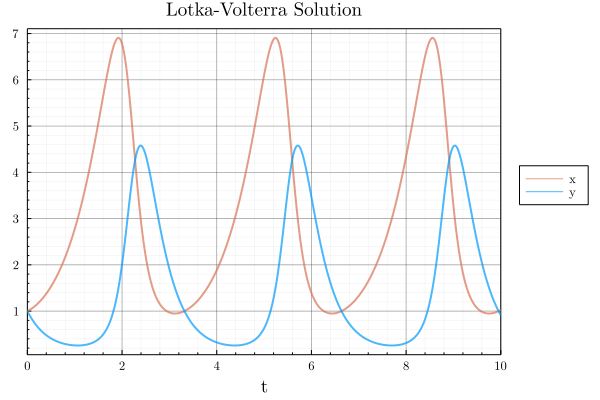

In [11]:
# Problem definition and reference solution
f = @ode_def LotkaVolterra begin
  dx = a*x - b*x*y
  dy = -c*y + d*x*y
end a b c d

p = [1.5,1.0,3.0,1.0]
prob = ODEProblem(f,[1.0;1.0],(0.0,10.0),p)

abstols = 1.0 ./ 10.0 .^ (6:13)
reltols = 1.0 ./ 10.0 .^ (3:10);
sol = solve(prob,Vern7(),abstol=1/10^14,reltol=1/10^14)
test_sol = TestSolution(sol)
plot(sol, title="Lotka-Volterra Solution", linewidth=2)

## Low Order

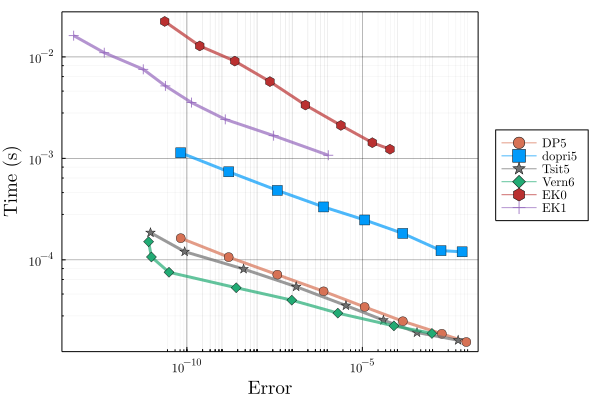

In [12]:
setups = [Dict(:alg=>DP5())
          #Dict(:alg=>ode45()) # fail
          Dict(:alg=>dopri5())
          Dict(:alg=>Tsit5())
          Dict(:alg=>Vern6())
          Dict(:alg=>EK0(order=4, smooth=false))
          Dict(:alg=>EK1(order=5, smooth=false))
]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;appxsol=test_sol,save_everystep=false,maxiters=100000,numruns=10)
plot(wp)

### Interpolation Error

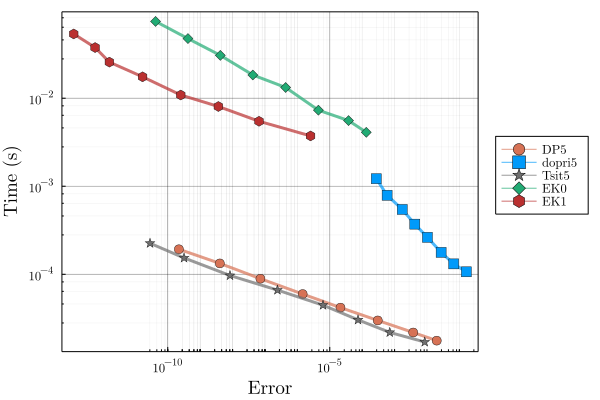

In [13]:
setups = [Dict(:alg=>DP5())
          #Dict(:alg=>ode45())
          Dict(:alg=>dopri5())
          Dict(:alg=>Tsit5())
          #Dict(:alg=>Vern6()) # does not work currently for some reason
          Dict(:alg=>EK0(order=4))
          Dict(:alg=>EK1(order=5))
]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
    appxsol=test_sol,maxiters=1000000,error_estimate=:L2,dense_errors=true,numruns=10)
plot(wp)

## Higher Order

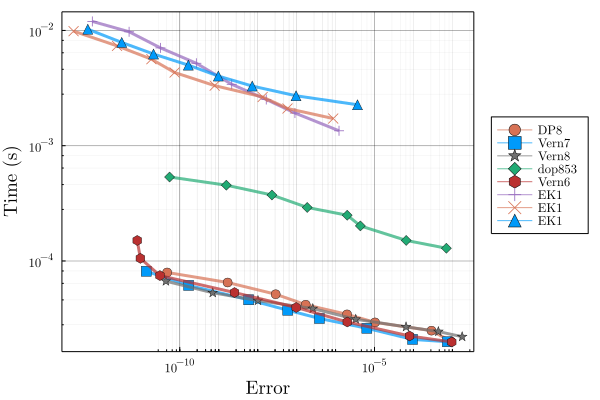

In [14]:
setups = [Dict(:alg=>DP8())
          #Dict(:alg=>ode78()) # fails
          Dict(:alg=>Vern7())
          Dict(:alg=>Vern8())
          Dict(:alg=>dop853())
          Dict(:alg=>Vern6())
          Dict(:alg=>EK1(order=6, smooth=false))
          Dict(:alg=>EK1(order=7, smooth=false))
          Dict(:alg=>EK1(order=8, smooth=false))
]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;appxsol=test_sol,save_everystep=false,maxiters=100000,numruns=10)
plot(wp)

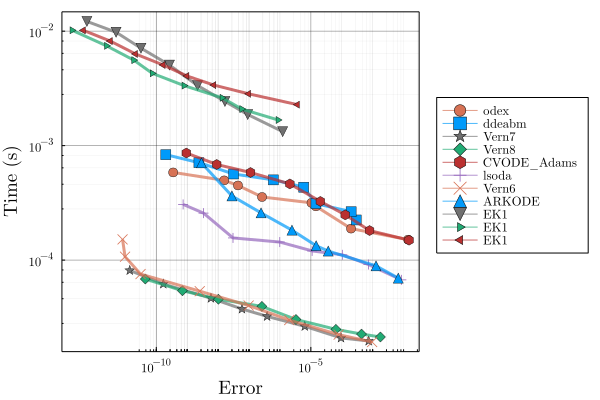

In [15]:
setups = [Dict(:alg=>odex())
          Dict(:alg=>ddeabm())
          Dict(:alg=>Vern7())
          Dict(:alg=>Vern8())
          Dict(:alg=>CVODE_Adams())
          Dict(:alg=>lsoda())
          Dict(:alg=>Vern6())
          Dict(:alg=>ARKODE(Sundials.Explicit(),order=6))
          Dict(:alg=>EK1(order=6, smooth=false))
          Dict(:alg=>EK1(order=7, smooth=false))
          Dict(:alg=>EK1(order=8, smooth=false))
          ]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
    appxsol=test_sol,save_everystep=false,maxiters=100000,numruns=10)
plot(wp)

### Interpolation Error

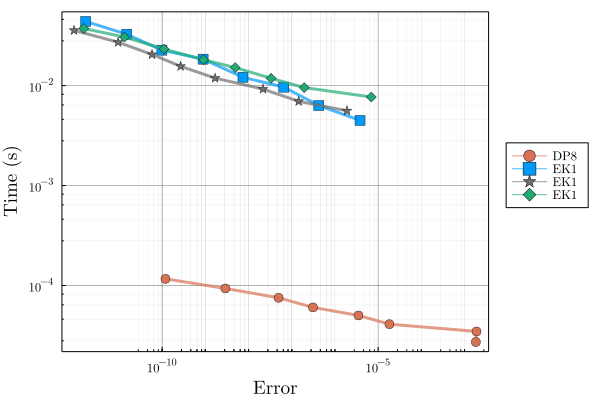

In [16]:
setups = [Dict(:alg=>DP8())
          #Dict(:alg=>ode78())
          # For some reasons the Vern methods do not work right now
          #Dict(:alg=>Vern7())
          #Dict(:alg=>Vern8())
          #Dict(:alg=>Vern6())
          Dict(:alg=>EK1(order=6))
          Dict(:alg=>EK1(order=7))
          Dict(:alg=>EK1(order=8))
]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
    appxsol=test_sol,dense=true,maxiters=100000,error_estimate=:L2,numruns=10)
plot(wp)